In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl

from sklearn.neighbors import KernelDensity

import seaborn as sns
import os

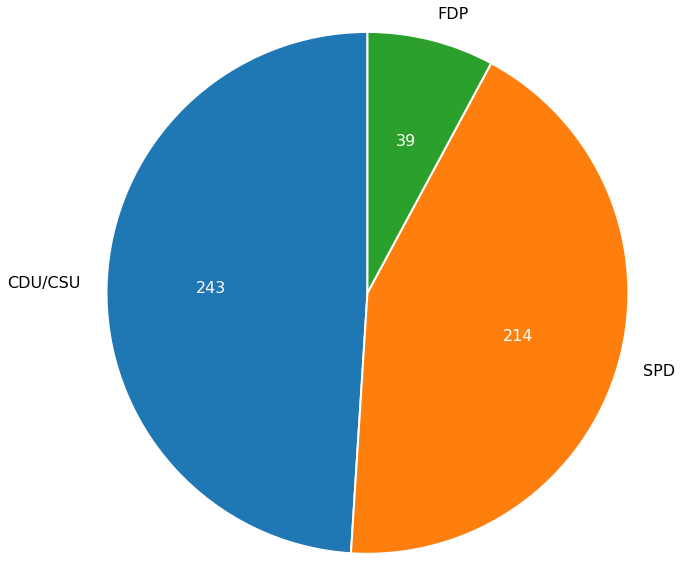

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
bundestag = ['CDU/CSU','SPD','FDP']
seats = [243, 214, 39]
patches, texts, autotexts=ax.pie(seats, 
                                 labels =bundestag, 
                                 autopct=lambda p : '{:,.0f}'.format(p * sum(seats)/100), 
                                 startangle=90, 
                                 wedgeprops={'edgecolor':'white',"linewidth":2},
                                 radius=2)
for text in texts:
    text.set_color('k')
    text.set_fontsize(16)
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)

for patch in patches:
    patch.set_edgecolor('w')



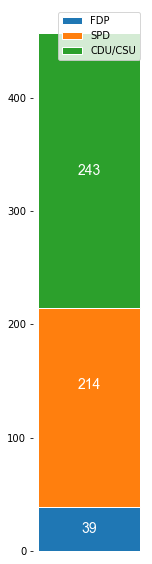

In [3]:
seat_distribution = {'FDP':39, 'SPD': 214, 'CDU/CSU':243}
fig, ax = plt.subplots(1,1,figsize=(2,10))
bottom = 0
for boolean, number in seat_distribution.items():
    axes = ax.bar([''], number,label = boolean, bottom=bottom, width=.01, edgecolor='w')
    bottom = number
    ax.bar_label(axes, label_type='center', color = 'white', family='Arial', size =14)

ax.spines[:].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.legend()

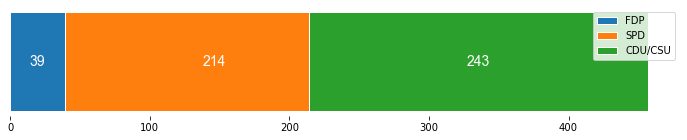

In [90]:
seat_distribution = {'FDP':39, 'SPD': 214, 'CDU/CSU':243}
fig, ax = plt.subplots(1,1,figsize=(12,2))
bottom = 0
for boolean, number in seat_distribution.items():
    axes = ax.barh([''], number,label = boolean, left=bottom, edgecolor='w')
    bottom = number
    ax.bar_label(axes, label_type='center', color = 'white', family='Arial', size =14)

ax.spines[:].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.legend()

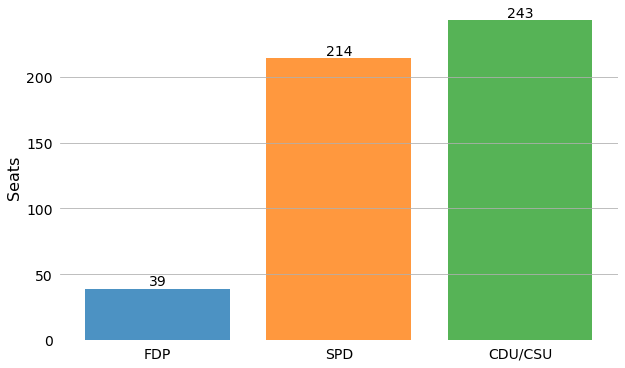

In [117]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
bundestag = ['FDP','SPD','CDU/CSU']
seats = [39, 214, 243]
axes = plt.bar(bundestag, seats, color = ['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8)
ax.bar_label(axes, label_type='edge', fontsize=14)
ax.spines[:].set_visible(False)
# ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.tick_params(axis='both', which='major', labelsize = 14)
ax.set_ylim([0,248])
ax.set_ylabel('Seats', fontsize=16)
ax.yaxis.grid()


### 10.2 A case for side-by-side bars

In [118]:
marketShare = pd.read_csv(os.path.join('data','marketshare.csv'))

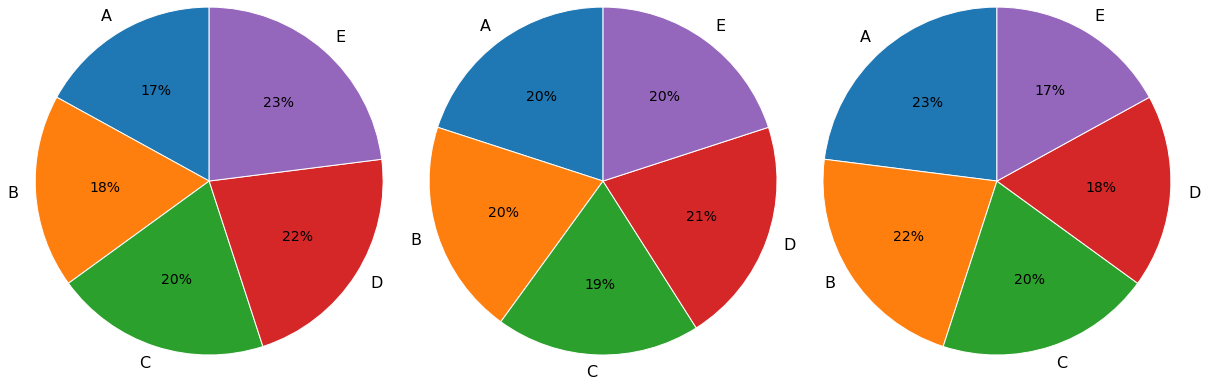

In [150]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,4))
patches, texts, autotexts = ax1.pie(marketShare[marketShare.year==2015].percent,
                                    labels=marketShare[marketShare.year==2015].company,
                                    autopct='%.0f%%',
                                    startangle=90,
                                    radius=2
                                    )
for patch,text,autotext in zip(patches,texts,autotexts):
    patch.set_edgecolor('w')
    text.set_fontsize(16)
    autotext.set_fontsize(14)


patches, texts, autotexts = ax2.pie(marketShare[marketShare.year==2016].percent,
                                    labels=marketShare[marketShare.year==2016].company,
                                    autopct='%.0f%%',
                                    startangle=90,
                                    radius=2
                                    )
for patch,text,autotext in zip(patches,texts,autotexts):
    patch.set_edgecolor('w')
    text.set_fontsize(16)
    autotext.set_fontsize(14)


patches, texts, autotexts = ax3.pie(marketShare[marketShare.year==2017].percent,
                                    labels=marketShare[marketShare.year==2017].company,
                                    autopct='%.0f%%',
                                    startangle=90,
                                    radius=2
                                    )
for patch,text,autotext in zip(patches,texts,autotexts):
    patch.set_edgecolor('w')
    text.set_fontsize(16)
    autotext.set_fontsize(14)

In [172]:
marketSharedf = marketShare.pivot_table(index='year', columns='company', values='percent')
marketSharedf.columns =['A','B','C','D','E']

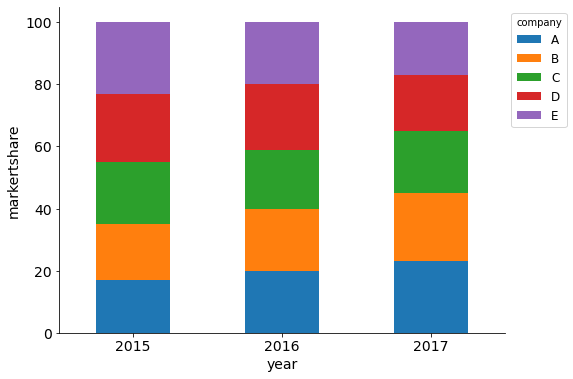

In [186]:
fig, ax1 = plt.subplots(1,1,figsize=(8,6))
marketSharedf.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    # alpha=0.7
    )
ax1.set_xticklabels(["2015","2016","2017"],rotation=0)
ax1.legend(bbox_to_anchor=(1, 1), title ='company', fontsize=12)
ax1.set_xlabel('year',fontsize=14)
ax1.set_ylabel('markertshare',fontsize=14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=14)

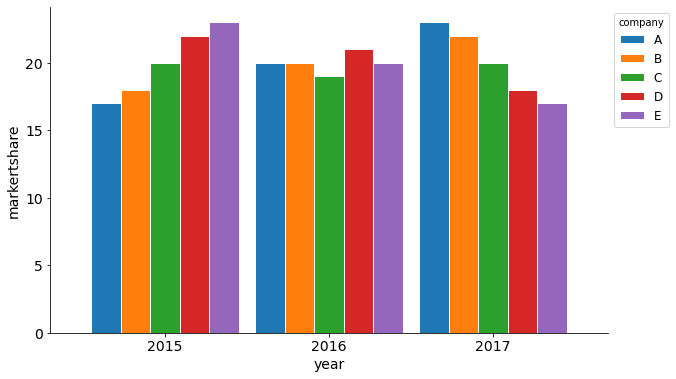

In [191]:
fig, ax1 = plt.subplots(1,1,figsize=(10,6))
marketSharedf.plot(
    kind='bar',
    # stacked=True,
    ax=ax1,
    width=.9,
    edgecolor='w'
    )
ax1.set_xticklabels(["2015","2016","2017"],rotation=0)
ax1.legend(bbox_to_anchor=(1, 1), title ='company', fontsize=12)
ax1.set_xlabel('year',fontsize=14)
ax1.set_ylabel('markertshare',fontsize=14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=14)

### 10.3 A case for stacked bars adn stacked densities

In [226]:
women_parliaments = pd.read_csv(os.path.join('data','women_parliaments.csv'))
women_parliaments_Rwanda = women_parliaments[women_parliaments.country=='Rwanda']
women_parliaments_Rwanda['perc_men'] = 100-women_parliaments_Rwanda['perc_women']

women_parliaments_Rwanda = women_parliaments_Rwanda.drop(['Unnamed: 0','country','country_code'],axis=1)
women_parliaments_Rwanda.set_index('year',inplace=True)

C:\Users\bpei\AppData\Local\Temp\ipykernel_14488\321016591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_parliaments_Rwanda['perc_men'] = 100-women_parliaments_Rwanda['perc_women']


C:\Users\bpei\AppData\Local\Temp\ipykernel_14488\1950817311.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['1990','2001','2006','2011','2016'],rotation=0)


Text(0, 0.5, 'Relative Proportion (%)')

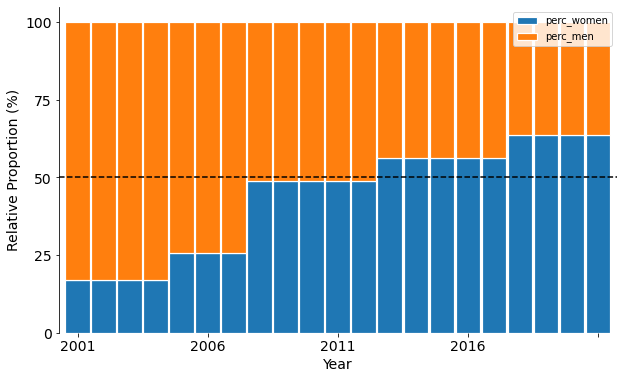

In [255]:
fig, ax1 = plt.subplots(1,1,figsize = (10,6))
women_parliaments_Rwanda.plot(kind= 'bar',  stacked=True, width=.95, color = [ '#1f77b4', '#ff7f0e',], edgecolor = 'w', linewidth =1.2, ax=ax1)
ax1.spines[:].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xticklabels(['1990','2001','2006','2011','2016'],rotation=0)
ax1.axhline(y=50, linestyle='--', color='k')
ax1.set_xlabel('Year',fontsize=14)
ax1.set_ylabel('Relative Proportion (%)',fontsize=14)

In [256]:
happy = pd.read_csv(os.path.join('data','happy.csv'))

Text(0, 0.5, 'relative proportion')

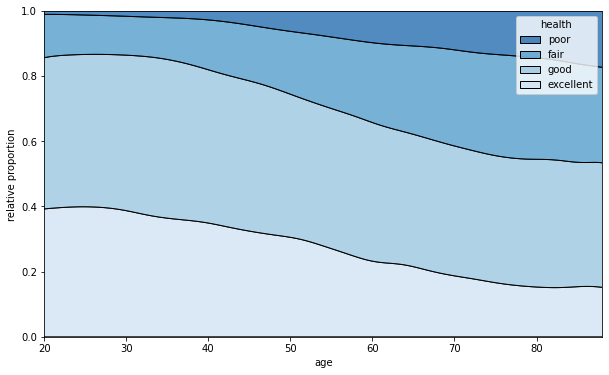

In [303]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.color_palette("Blues", as_cmap=True)
sns.kdeplot(
    data=happy, 
    x="age", 
    hue='health', 
    hue_order = ['poor','fair','good','excellent'], 
    palette='Blues_r',
    color= '#4798c5', 
    multiple='fill',
    # common_norm=False,
    )
ax.set_xlim([20, 88])
ax.set_ylabel('relative proportion')
# ax.legend(bbox_to_anchor=(1.1,1),fontsize=14)

### 10.4 Visualizing proportions separately as parts of the total

Text(0.5, 1.0, 'poor')

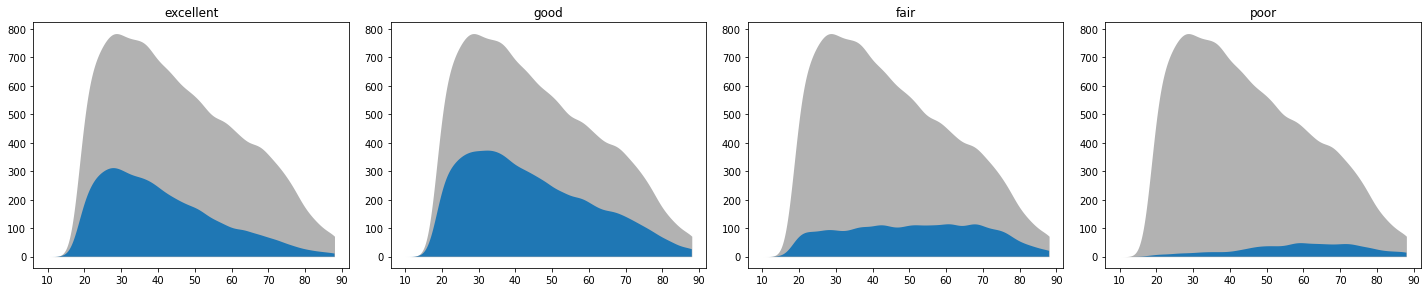

In [362]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,4))

plt.tight_layout()

happy_overall = happy.dropna()
happy_excellent = happy[happy['health']=='excellent'].dropna()
happy_good = happy[happy['health']=='good'].dropna()
happy_fair = happy[happy['health'] == 'fair'].dropna()
happy_poor = happy[happy['health'] == 'poor'].dropna()

x_plot = np.linspace(10, 88, 1000).reshape(-1,1)

kde_overall = KernelDensity(kernel='gaussian', bandwidth=2).fit(happy_overall['age'].values.reshape(-1,1))
kde_excellent = KernelDensity(kernel='gaussian', bandwidth=2).fit(happy_excellent['age'].values.reshape(-1,1))
kde_good = KernelDensity(kernel='gaussian', bandwidth=2).fit(happy_good['age'].values.reshape(-1,1))
kde_fair = KernelDensity(kernel='gaussian', bandwidth=2).fit(happy_fair['age'].values.reshape(-1,1))
kde_poor = KernelDensity(kernel='gaussian', bandwidth=2).fit(happy_poor['age'].values.reshape(-1,1))

log_overall = kde_overall.score_samples(x_plot)
log_excellent = kde_excellent.score_samples(x_plot)
log_good = kde_good.score_samples(x_plot)
log_fair = kde_fair.score_samples(x_plot)
log_poor = kde_poor.score_samples(x_plot)

ax1.fill_between(x_plot[:,0], np.exp(log_overall)*len(happy_overall),color='black', alpha = 0.3, linewidth=0)
ax1.fill_between(x_plot[:,0], np.exp(log_excellent)*len(happy_excellent), linewidth=0)
ax1.set_title('excellent')

ax2.fill_between(x_plot[:,0], np.exp(log_overall)*len(happy_overall),color='black', alpha = 0.3, linewidth=0)
ax2.fill_between(x_plot[:,0], np.exp(log_good)*len(happy_good), linewidth=0)
ax2.set_title('good')

ax3.fill_between(x_plot[:,0], np.exp(log_overall)*len(happy_overall),color='black', alpha = 0.3, linewidth=0)
ax3.fill_between(x_plot[:,0], np.exp(log_fair)*len(happy_fair), linewidth=0)
ax3.set_title('fair')

ax4.fill_between(x_plot[:,0], np.exp(log_overall)*len(happy_overall),color='black', alpha = 0.3, linewidth=0)
ax4.fill_between(x_plot[:,0], np.exp(log_poor)*len(happy_poor), linewidth=0)
ax4.set_title('poor')